In [3]:
import pandas as pd

ticker = 'SPY'

In [8]:
results = pd.read_csv(f"{ticker}_backtest_results.csv")

In [38]:
print(results.roi.min().round(2), results.roi.median().round(2), results.roi.mean().round(2), results.roi.max().round(2))

-0.45 0.65 0.84 2.93


<Axes: ylabel='Frequency'>

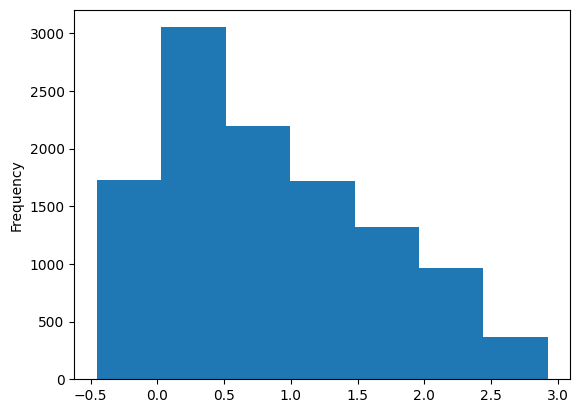

In [40]:
results.roi.plot.hist(bins=7)

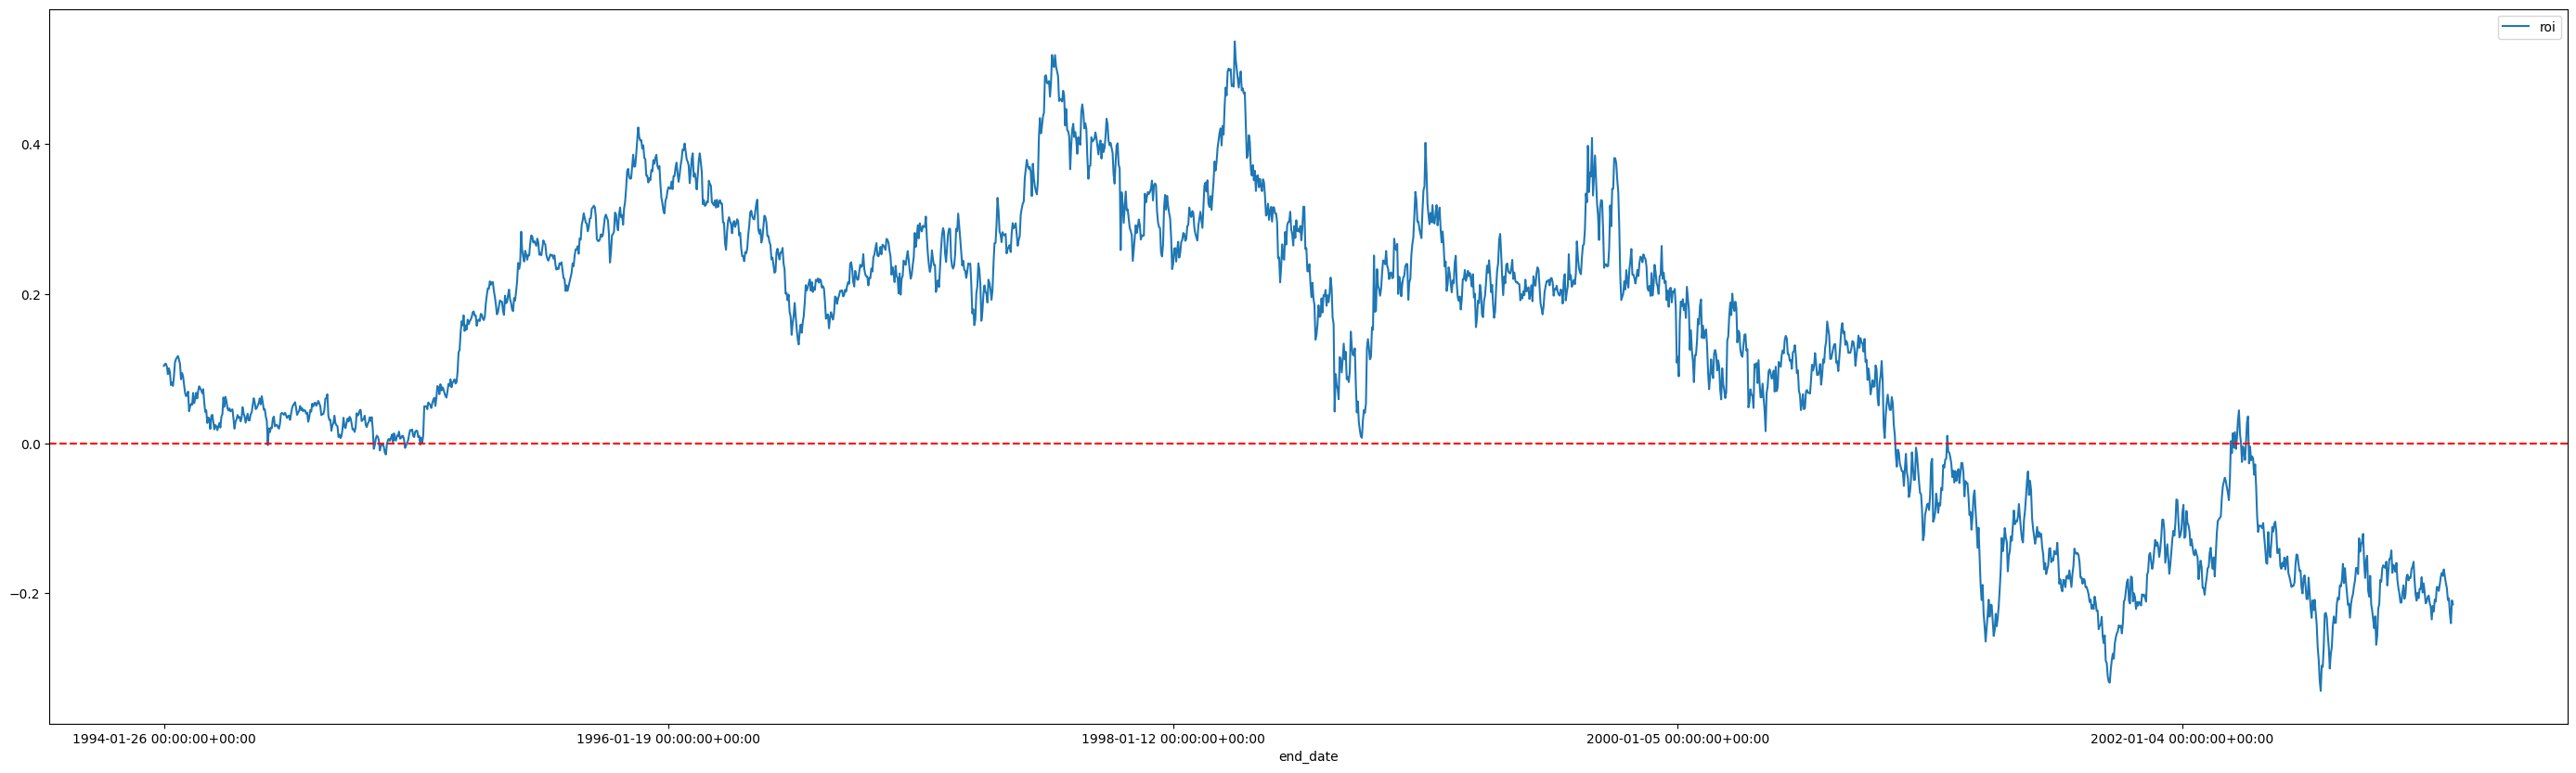

In [62]:
ax = results.query("holding_days == 252").sort_values("end_date")[["end_date", "roi"]].set_index("end_date").plot(figsize=(35, 10))
ax.axhline(y=0, color='red', linestyle='--')

In [2]:
df = yf.download(tickers=[ticker], start=None, end=None)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

df.index = pd.to_datetime(df.index)
df = df.rename_axis(None, axis=1)
df = df.reset_index(drop=False)

df = df.drop(columns=['Close'])
df = df.rename(columns={"Adj Close": "Close"})
df.columns = df.columns.str.lower()

df['close'] = df['close'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['volume'] = df['volume'].astype(int)

df['time'] = df['date'].astype('int64') // 10**9
df = df.set_index("date")

df = df[["open", "high", "low", "close", "volume", "time"]]

[*********************100%***********************]  1 of 1 completed


In [3]:
df.to_csv(f"{ticker}.csv", index=True)
df = pd.read_csv(f"{ticker}.csv", index_col="date")

In [4]:
df.head(2)

,open,high,low,close,volume,time
date,,,,,,
1993-01-29 00:00:00+00:00,43.96875,43.96875,43.75000,24.608622,1003200,728265600
1993-02-01 00:00:00+00:00,43.96875,44.25000,43.96875,24.783659,480500,728524800


In [7]:
del chart

In [8]:
chart = Chart()
# Columns: time | open | high | low | close | volume
chart.set(df.reset_index(drop=False))
chart.show(block=False)

ValueError: cannot assemble with duplicate keys

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


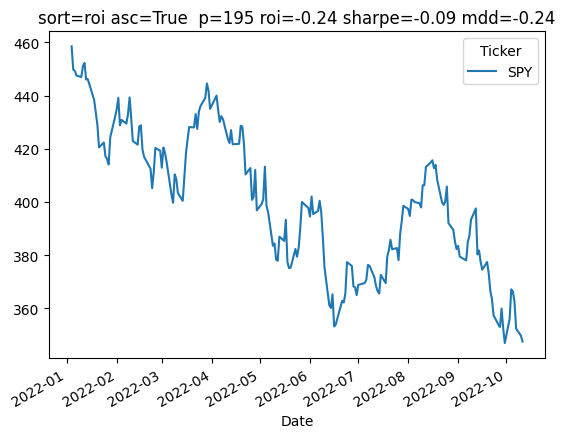

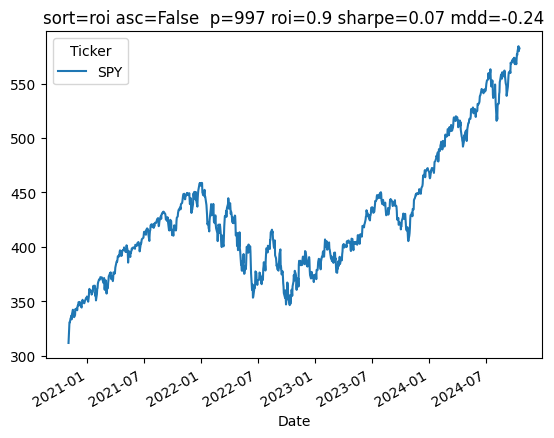

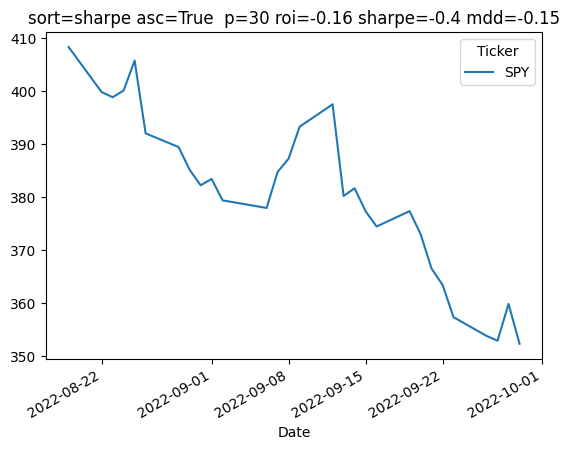

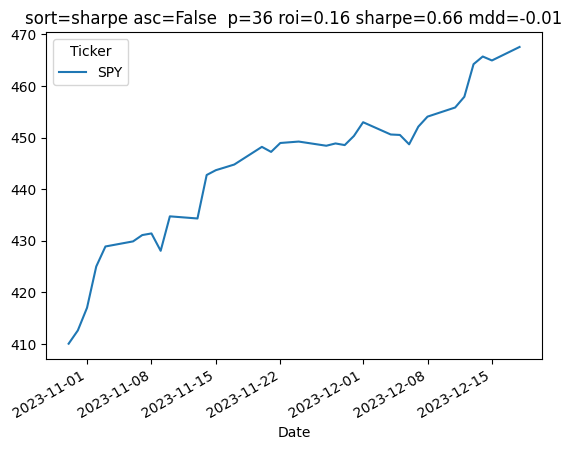

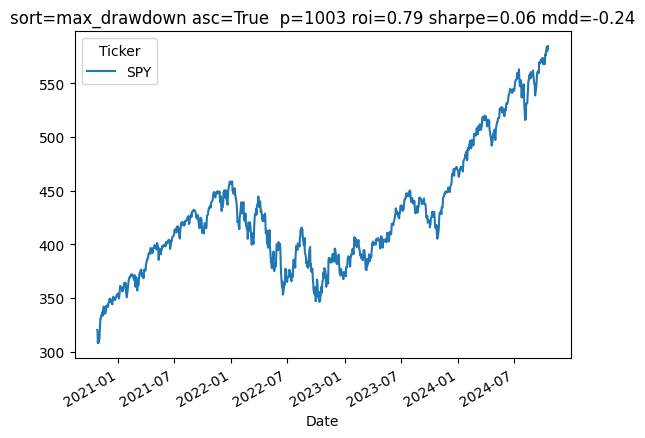

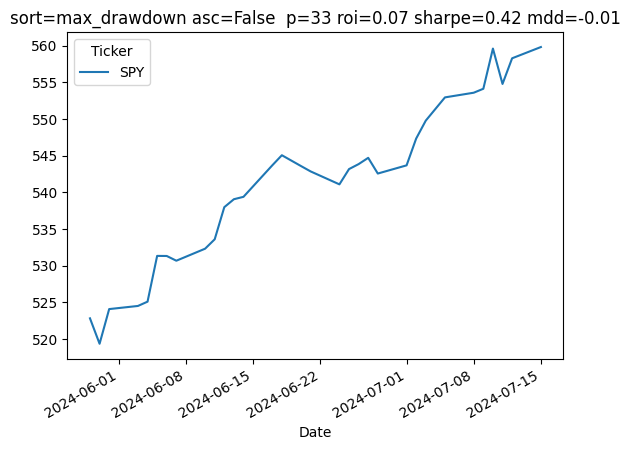

In [72]:
for metric_name in ["roi", "sharpe", "max_drawdown"]:
    for asc in [True, False]:
        result = df.sort_values([metric_name], ascending=asc).head(1).round(2)
        result = result.to_dict('records')[0]
        
        spy = yf.download(tickers=[ticker], start=result['start_date'].split()[0], end=result['end_date'].split()[0])

        title = f"sort={metric_name} asc={asc}  p={result['holding_period_days']} roi={result['roi']} sharpe={result['sharpe']} mdd={result['max_drawdown']}"        
        plt = spy["Adj Close"].plot(title=title)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


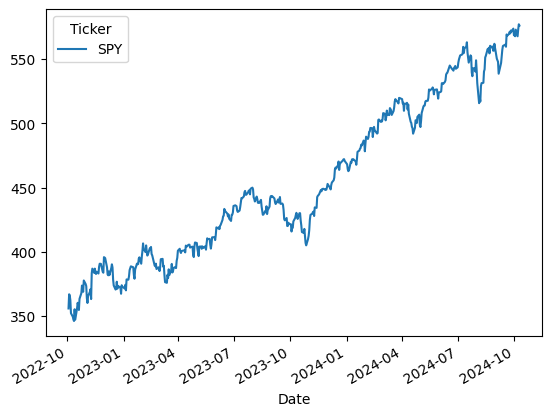

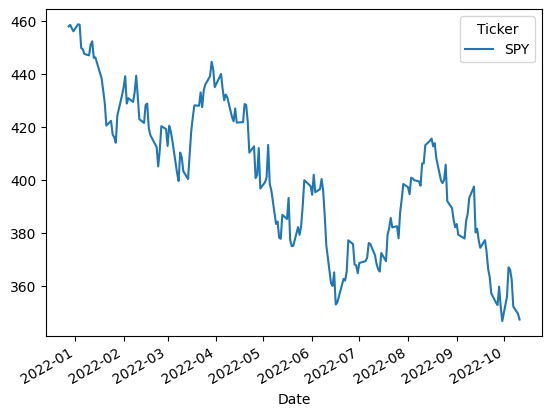

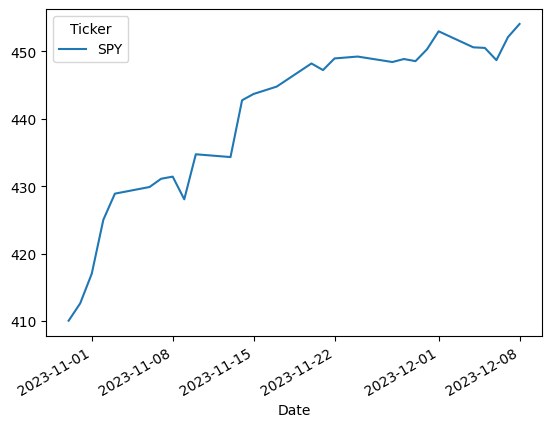

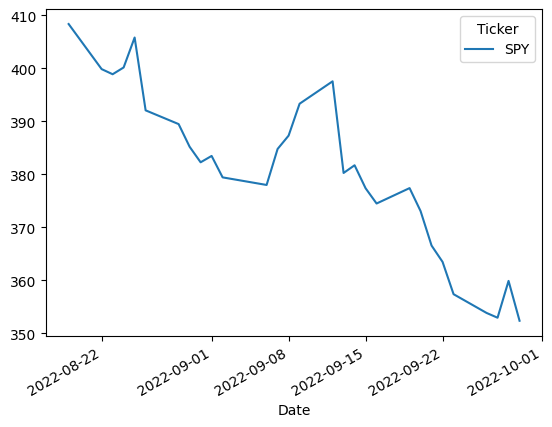

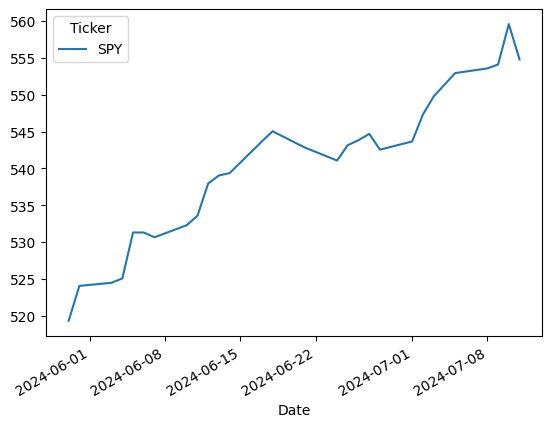

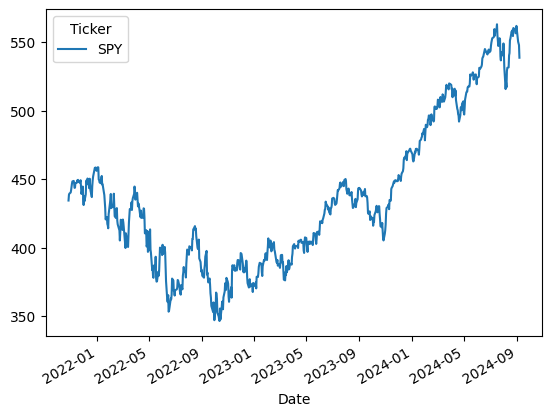

In [43]:
for metrics_df in [best_roi, worst_roi, best_sharpe, worst_sharpe, worst_mdd, best_mdd]:
    print(metrics_df)
    start, end = get_start_end(metrics_df)
    yf.download(tickers=[ticker], start=start, end=end)["Adj Close"].plot()